# Project: Investigate a Dataset - TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
> 1. Which genres are most popular from year to year?
> 2. What kinds of properties are associated with movies that have high revenues?
> 3. Are short movies more popular?
> 4. Are movies profits increasing overtime?

In [44]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [45]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [46]:
# After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [47]:
df.shape

(10866, 21)

In [48]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> 1. Checked data structure of TMDB and found inconsistencies, missing values, and incorrect datatype
> 2. The data will be cleaned first, then the questions I want answer to will be derived
 


#### Data cleaning process
> 1. Dropping unnecessary columns ('imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview')
> 2. Dropping null values
> 3. Drop duplicates
> 4. Cast dates
> 5. Drop genre and production companies after first '|' to get first normal form

 

In [49]:
#1. Dropping unnecessary columns ('imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview')
df=df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], axis=1)

In [50]:
df = df.dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

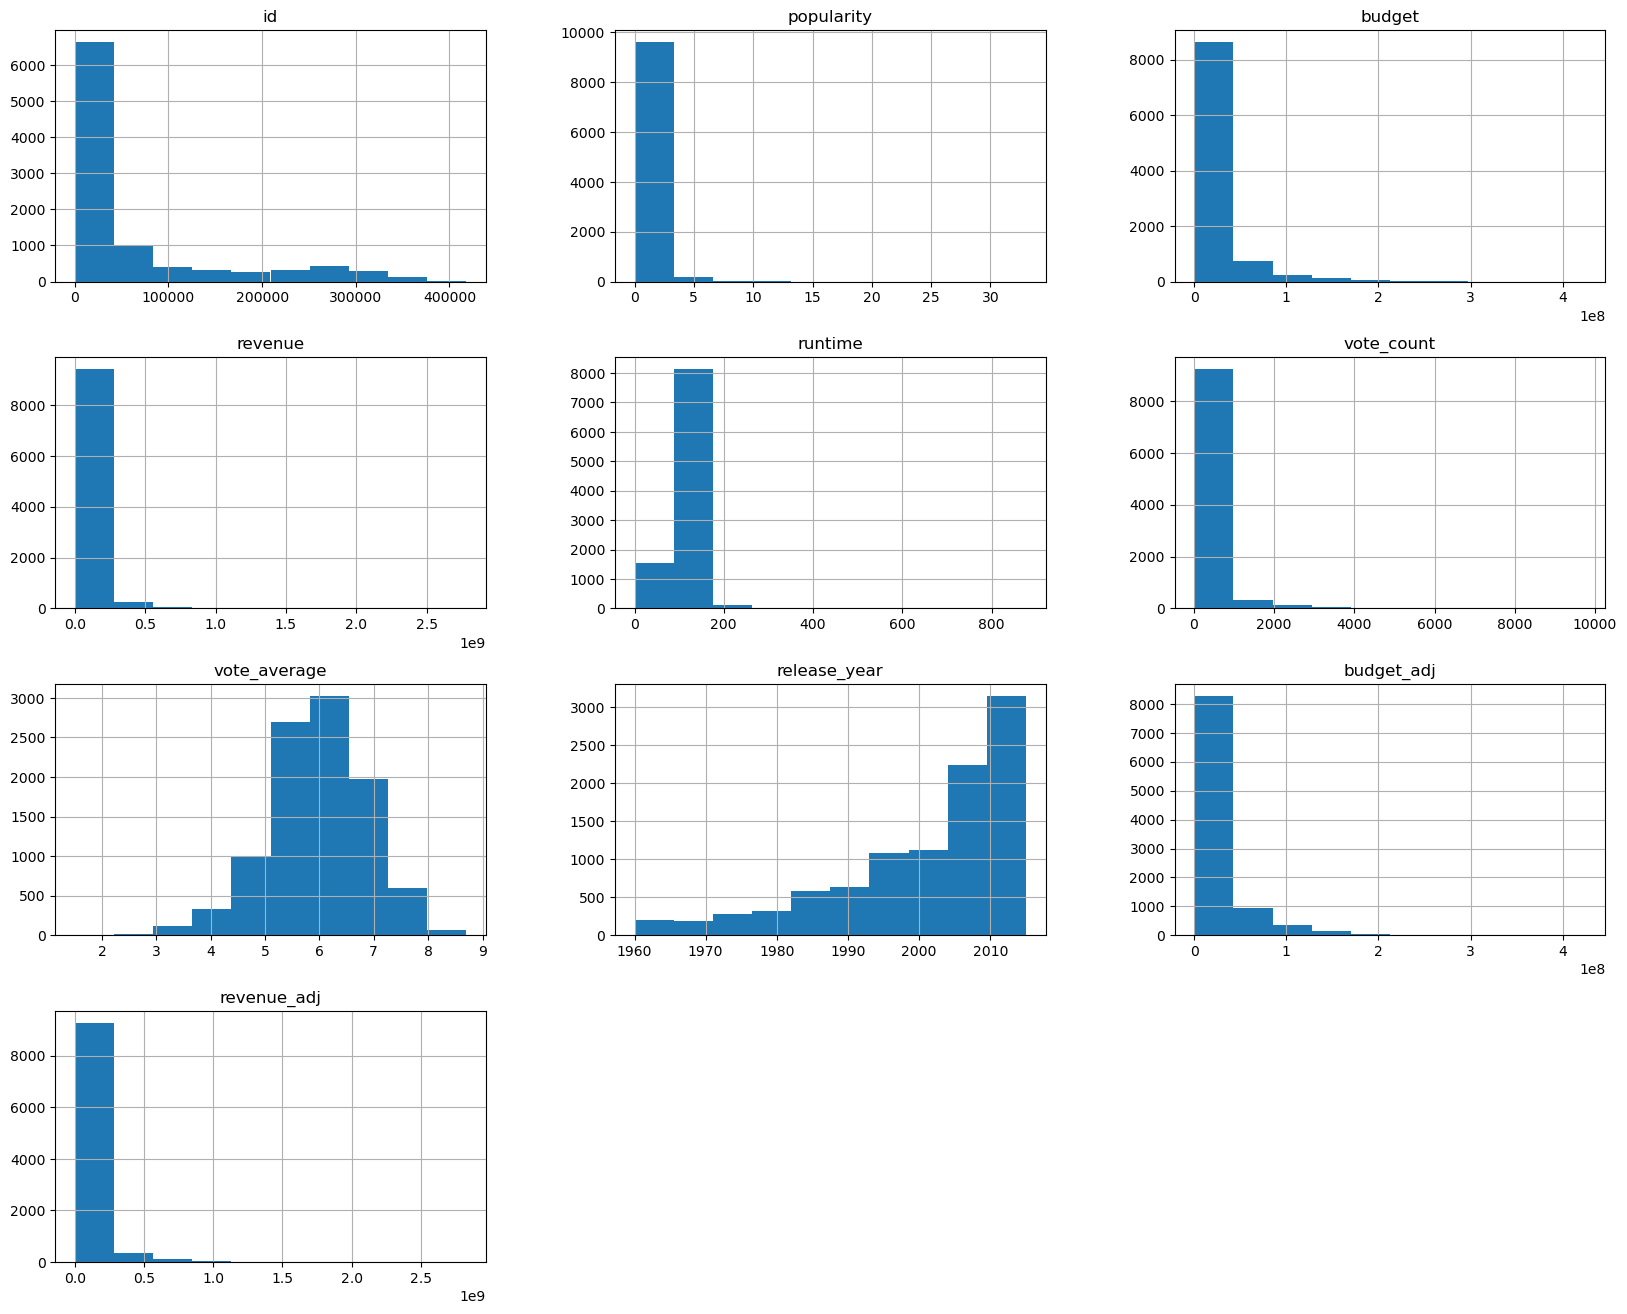

In [52]:
df.hist(figsize=(20,16))

In [53]:
#2. Dropping null values
df = df.replace(0, np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3808 non-null   int64  
 1   popularity            3808 non-null   float64
 2   budget                3808 non-null   float64
 3   revenue               3808 non-null   float64
 4   original_title        3808 non-null   object 
 5   director              3808 non-null   object 
 6   runtime               3808 non-null   float64
 7   genres                3808 non-null   object 
 8   production_companies  3808 non-null   object 
 9   release_date          3808 non-null   object 
 10  vote_count            3808 non-null   int64  
 11  vote_average          3808 non-null   float64
 12  release_year          3808 non-null   int64  
 13  budget_adj            3808 non-null   float64
 14  revenue_adj           3808 non-null   float64
dtypes: float64(7), int64

In [54]:
#3. Remove duplicates
sum(df.duplicated())
df.drop_duplicates(inplace=True)
sum(df.duplicated())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3807 non-null   int64  
 1   popularity            3807 non-null   float64
 2   budget                3807 non-null   float64
 3   revenue               3807 non-null   float64
 4   original_title        3807 non-null   object 
 5   director              3807 non-null   object 
 6   runtime               3807 non-null   float64
 7   genres                3807 non-null   object 
 8   production_companies  3807 non-null   object 
 9   release_date          3807 non-null   object 
 10  vote_count            3807 non-null   int64  
 11  vote_average          3807 non-null   float64
 12  release_year          3807 non-null   int64  
 13  budget_adj            3807 non-null   float64
 14  revenue_adj           3807 non-null   float64
dtypes: float64(7), int64

In [55]:
#4. Cast dates from object to datetime
df["release_date"] = pd.to_datetime(df["release_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3807 non-null   int64         
 1   popularity            3807 non-null   float64       
 2   budget                3807 non-null   float64       
 3   revenue               3807 non-null   float64       
 4   original_title        3807 non-null   object        
 5   director              3807 non-null   object        
 6   runtime               3807 non-null   float64       
 7   genres                3807 non-null   object        
 8   production_companies  3807 non-null   object        
 9   release_date          3807 non-null   datetime64[ns]
 10  vote_count            3807 non-null   int64         
 11  vote_average          3807 non-null   float64       
 12  release_year          3807 non-null   int64         
 13  budget_adj       

In [56]:
#5. Drop genre and production companies after first '|' to get first normal form
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### 1. Which genres are most popular from year to year?

In [57]:
genres_popularity = df.groupby(['genres'])['popularity'].mean()
print (genres_popularity)

genres
Action             1.451147
Adventure          1.915165
Animation          1.739861
Comedy             0.924824
Crime              1.074895
Documentary        0.336343
Drama              0.938702
Family             1.609295
Fantasy            1.595149
History            1.442235
Horror             0.860527
Music              0.914098
Mystery            1.133780
Romance            1.386988
Science Fiction    1.931437
TV Movie           0.273628
Thriller           1.171430
War                1.658497
Western            1.193918
Name: popularity, dtype: float64


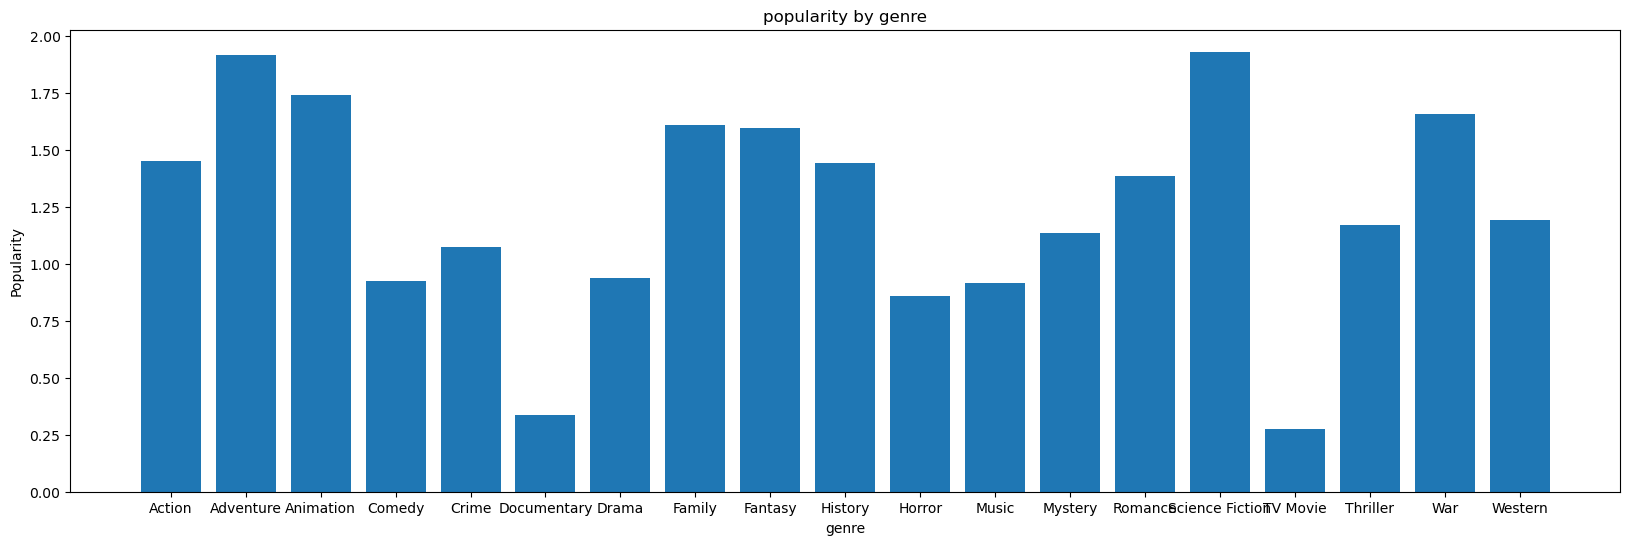

In [58]:
plt.subplots(figsize=(20, 6))
plt.bar(genres_popularity.index, genres_popularity)
plt.title('popularity by genre')
plt.xlabel('genre')
plt.ylabel('Popularity');

### 2. What kinds of properties are associated with movies that have high revenues?

In [59]:
sorted_revenue_biggest = df.sort_values(by=['revenue'], ascending = False).head(200)
sorted_revenue_biggest.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162.0,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


<AxesSubplot:>

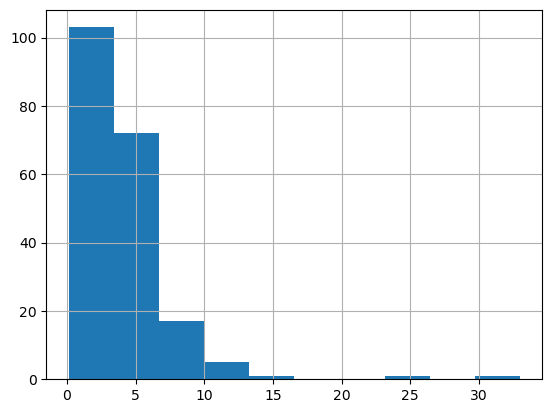

In [60]:
sorted_revenue_biggest.popularity.hist()

<AxesSubplot:>

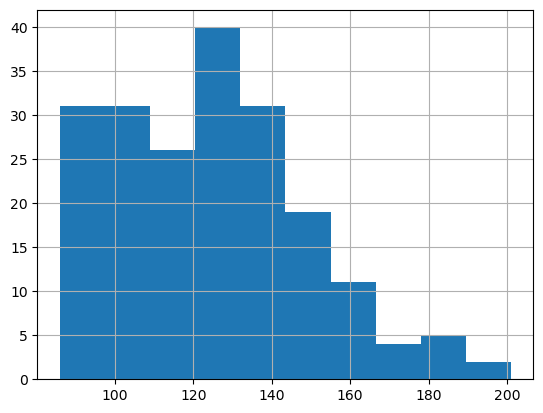

In [61]:
sorted_revenue_biggest.runtime.hist()

Movies with highest revenues last between 1.5 to 2.5 hours total. This is seem like an industry standard

### 3. Are short movies more popular?

In [62]:
shorter_movies = df.sort_values(by=['runtime'], ascending = False).head(200)
runtime = shorter_movies['runtime']
popularity = shorter_movies['popularity']

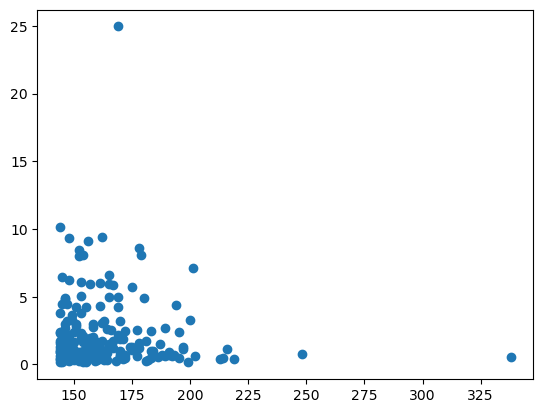

In [63]:
plt.scatter(runtime, popularity)
plt.show()

Results are heavily concentrated between movies lasting between 90 to 175 minutes, with popularity highs of about 9 to 10 points. Meaning that anything shorter than 90 minutes doesn't necessarilly make a movie more popular

### 4. Are movies profits increasing overtime?

In [64]:
df.insert(1,"profit",df["revenue"] - df["budget"])
df.head()

,id,profit,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,1.363529e+09,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,2.284364e+08,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,1.852382e+08,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,1.868178e+09,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,1.316249e+09,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [65]:
df.head()

,id,profit,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,1.363529e+09,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,2.284364e+08,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,1.852382e+08,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,1.868178e+09,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,1.316249e+09,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [66]:
# definding a function to calculate the mean for column2 and groupby by column1
def groupby_avg(column1,column2):
    avg_gb_data = df.groupby(column1)[column2].mean()
    return avg_gb_data

Text(0, 0.5, 'Profit in Billions')

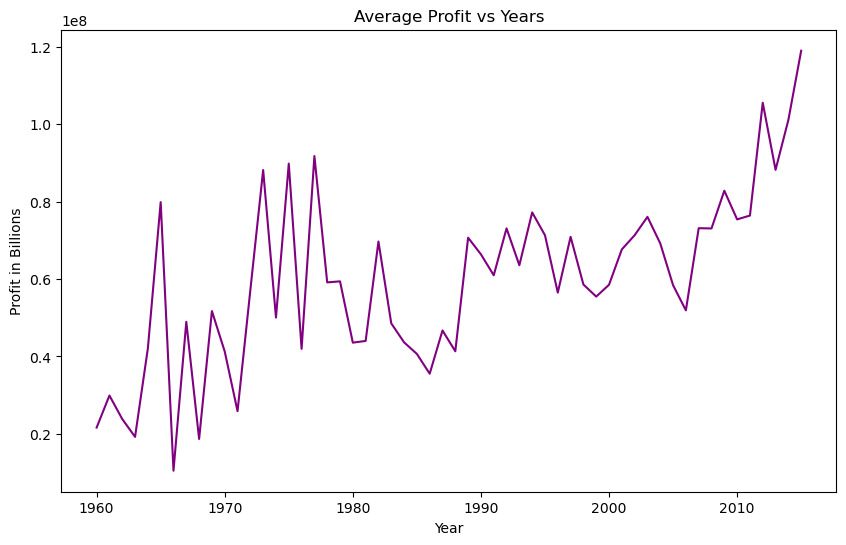

In [67]:
# group by release year and profit
avg_profit_year = groupby_avg("release_year","profit")

# plot relationship between release_year and profit
avg_profit_year.plot(kind='line',color='purple',title='Average Profit vs Years',figsize = (10,6))
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Profit in Billions')

Profit in billions is at a historical high. With the current industry having to produce films at a very high pace to satisfy content demand, profits are only going to continue growing

<a id='conclusions'></a>
## Conclusions

> 1. Adventure as the most popular movie genre, closely followed by Sci-Fi.
> 2. Most popular movies last about 90 - 120 minutes. Anything longer and popularity drops
> 3. Short movies are not more popular than longer movies.
> 4. Movie profits are at historical highs. They seem to only keep climbing